In [5]:
#Import Libraries
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd

In [2]:
#Load Template and draw boundary
template = cv2.imread(r"M:\tempMatchTest\temp.jpg",0) #directory of template
w, h = template.shape[::-1] #finds shape of template
detectedObjects = 0 #variable for counting image iteration

In [3]:
#Writing initial row to csv for data processing purposes
ofile  = open('match_results.csv', "w")
writer = csv.writer(ofile, delimiter=' ')
writer.writerow(["Data"])
ofile.close()

1 Template not located in: Sample Off    19  Jan_31_16_28_19.JPEG
2 Template not located in: Sample Off    20  Jan_31_16_28_36.JPEG
3 Template not located in: Sample Off    21  Jan_31_16_28_53.JPEG
4 Template not located in: Sample Off    22  Jan_31_16_29_10.JPEG
5 Template not located in: Sample Off    23  Jan_31_16_29_27.JPEG
6 Template not located in: Sample Off    24  Jan_31_16_29_44.JPEG
7 Template located in: Sample On     2  Jan_31_16_22_14.JPEG
8 Template located in: Sample On     3  Jan_31_16_22_31.JPEG
9 Template located in: Sample On     4  Jan_31_16_22_48.JPEG
10 Template located in: Sample On     5  Jan_31_16_23_56.JPEG
11 Template located in: Sample On     6  Jan_31_16_24_13.JPEG
12 Template located in: Sample On     7  Jan_31_16_24_30.JPEG


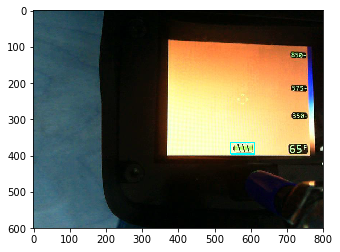

In [6]:
#Execute image search process
for fil in glob.glob("*.jpeg"):
    image = cv2.imread(fil) #read image global image files in directory
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # convert to greyscale
    res = cv2.matchTemplate(gray_image,template,cv2.TM_CCOEFF_NORMED) #performs template matching
    threshold = 0.9 #set matching threshold. To be tuned further !!!
    loc = np.where(res >= threshold) #checks if template matches
    try:
        if np.any(loc[0]) > 0: 
            a = np.asarray(loc[0])[np.newaxis] #Transposes location matching coordinates
            detectedObjects = detectedObjects+1
            print(detectedObjects,"Template located in:",fil)
            
            for pt in zip(*loc[::-1]): #used for locating the matched template in the image
                cv2.rectangle(image, pt, (pt[0] + w, pt[1] + h), (0,255,255), 2)
                plt.imshow(image)
                
            with open("match_results.csv",'a',newline='') as csvfile:
                spamwriter = csv.writer(csvfile, delimiter=' ')
                spamwriter.writerow(["Located"])
        else:
            detectedObjects = detectedObjects+1
            print(detectedObjects,"Template not located in:",fil)
            
            with open("match_results.csv",'a',newline='') as csvfile:
                spamwriter = csv.writer(csvfile, delimiter=' ')
                spamwriter.writerow(["NotLocated"])
            continue
    except KeyboardInterrupt:

        cv2.destroyAllWindows()
        cv2.waitKey(0)


In [14]:
#Execute Data Analysis with results
df = pd.read_csv('match_results.csv')
missdat = df.isnull()
missdat.head()

,Data
0,False
1,False
2,False
3,False
4,False


In [18]:
#search for any missing data and count values
for column in missdat.columns.values.tolist():
    print(column)
    print (missdat[column].value_counts())
    print("")

Data
False    12
Name: Data, dtype: int64



In [19]:
#generate count statistics
for column in df.columns.values.tolist():
    print(column)
    print (df[column].value_counts())
    print("")

Data
Located       6
NotLocated    6
Name: Data, dtype: int64

